# EXECUTIVE SUMMARY

1. Optimum Machine Model Chosen: 
2. Accuracy Score: 
3. Cross Validation Score: 
4. Final Accuracy Score(After Hyperparamter Tunning): 
5. RMSE:
6. Key Operations executed: Exploratory Data Analysis(EDA), Data Preprocessing(Univariate,Bivariate,Multivariate), Metrics Measurement, Model Execution and Hyperparameter Tunning

# PROJECT CONTENTS
- Problem Statement
- Domain Knowledge
- Step 1: Attributes of Variables
- Step 2: LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
     - 2.1:Import all necessary libraries
     - 2.2:Load Dataset
     - 2.3:Descriptive Analysis
     - 2.4:Observations
- Step 3: Exploratory Data Analysis
     - 3.1:Encoding
     - 3.2:Normal Distribution Check(Univariate Analysis)
     - 3.3:Scatter Plot Check(Bivariate Analysis)
     - 3.4:Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis
     - 3.5:Outlier Check
     - 3.6:Skewness Check
     - 3.7:Categorical Variable(s) Check
- Step 4: DATA PREPROCESSING
     - 4.1:Removal of Duplicates
     - 4.2:Dropping of Features that strongly promotes multicollinearity(VIF)
     - 4.3:Removal of Outliers
     - 4.4:Transforming Data to Remove Skewness using Power transformation
     - 4.5:Seperating the datasets into X and Y variables
- Step 5: MODEL BUILDING
     - 5.1:Linear Regression
     - 5.2:RandomForest Regressor
     - 5.3:AdaBoost Regressor
     - 5.4:GradientBoosting Regressor
     - 5.5:XGBoost Regressor
     - 5.6:ExtraTrees Regressor
     - 5.7:Support Vector Regressor(SVR)
- Step 6:COMPARING ALL MACHINE LEARNING MODELS
     - 6.1:Comparing Differences between Accuracy and Cross_Validation Scores...
     - 6.2:Conclusion on Choice of Model
- Step 7:HYPERPARAMETER TUNNING
- Step 8:MODEL SAVING

# PROBLEM STATEMENT(Avacado Project)

Avocado is a fruit consumed by people heavily in the United States. 
Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file.
Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

# Domain Knowledge
This is critical stage in any machine learning process. It involves brainstorming and coming up with as many hypothesis as possible about what could affect the target variable. It facilitates in exploring the data at hand more efficiently and effectively. Domain Knowledge should be done before seeing the data or else we will end up with biased hypotheses. Below are some anticipated assertions on the problem statement.


# Step 1 - ATTRIBUTES OF VARIABLES

Some relevant columns in the dataset:

1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold

# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# Step 2.1 - Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,power_transform,PowerTransformer,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve,mean_squared_error,mean_absolute_error
from scipy.stats import zscore
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


import warnings
warnings.filterwarnings('ignore')

# Step 2.2 - Load Dataset

In [2]:
#Load dataset
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
# There is a column called unamed column in this dataset and we will have to drop it because its not useful

df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
#checking the first five rows
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
#checking the last five rows
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
#picking 4 random samples
df.sample(4)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
3985,2016-05-08,0.64,3942054.31,1416928.16,929683.64,107683.95,1487758.56,1104179.23,362931.85,20647.48,conventional,2016,LosAngeles
6757,2017-06-18,1.01,357696.04,133507.85,55577.57,6723.34,161887.28,55967.51,105919.77,0.00,conventional,2017,LasVegas
8028,2017-06-25,0.92,6466429.64,3274928.07,1121983.76,16796.23,2052721.58,1518938.69,530616.80,3166.09,conventional,2017,SouthCentral
673,2015-01-18,0.99,808194.41,151976.70,500683.50,4225.31,151308.90,77528.06,73764.68,16.16,conventional,2015,Denver


# Step 2.3 - Data Descriptive Analysis

In [7]:
#checking the data shape
df.shape

(18249, 13)

In [8]:
#checking for nature of datatypes
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [9]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [10]:
#Checking data description for all numerical columns
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
#Checking data description for all non-numerical columns
numerics = ['int8','int16','int32','int64','float16','float32','float64']#enlisiting and storing possible data types of continuous data. This means any continuous data MUST have any of this type of data type
categorical_columns=[]#initializing an emty list
features = df.columns.values.tolist()#Pulling all the features(columns) of the dataset and storing in features
for col in features:#col is the iterating variable
    if df[col].dtype in numerics:
        continue
    categorical_columns.append(col)
df[categorical_columns].describe()

,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2015-12-27,conventional,Albany
freq,108,9126,338


In [12]:
#lets check the columns
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [13]:
#Checking for null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

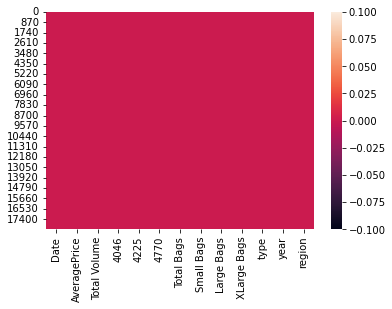

In [14]:
# checking for null values using heatmap visualisation
# As you can see there are no null values because the color red is uniform and distributed equally
sns.heatmap(df.isnull())

In [15]:
#Checking for null values
df.isnull().sum().sum()

0

In [16]:
# checking for the data types
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [17]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [18]:
#Checking the content of each Categorical columns
print("The Value Counts in type - ",Counter(df['type']))
print("The Value Counts in region - ",Counter(df['region']))
print("The Value Counts in Date  - ",Counter(df['Date']))

The Value Counts in type -  Counter({'conventional': 9126, 'organic': 9123})
The Value Counts in region -  Counter({'Albany': 338, 'Atlanta': 338, 'BaltimoreWashington': 338, 'Boise': 338, 'Boston': 338, 'BuffaloRochester': 338, 'California': 338, 'Charlotte': 338, 'Chicago': 338, 'CincinnatiDayton': 338, 'Columbus': 338, 'DallasFtWorth': 338, 'Denver': 338, 'Detroit': 338, 'GrandRapids': 338, 'GreatLakes': 338, 'HarrisburgScranton': 338, 'HartfordSpringfield': 338, 'Houston': 338, 'Indianapolis': 338, 'Jacksonville': 338, 'LasVegas': 338, 'LosAngeles': 338, 'Louisville': 338, 'MiamiFtLauderdale': 338, 'Midsouth': 338, 'Nashville': 338, 'NewOrleansMobile': 338, 'NewYork': 338, 'Northeast': 338, 'NorthernNewEngland': 338, 'Orlando': 338, 'Philadelphia': 338, 'PhoenixTucson': 338, 'Pittsburgh': 338, 'Plains': 338, 'Portland': 338, 'RaleighGreensboro': 338, 'RichmondNorfolk': 338, 'Roanoke': 338, 'Sacramento': 338, 'SanDiego': 338, 'SanFrancisco': 338, 'Seattle': 338, 'SouthCarolina': 338

In [19]:
#Checking the content of each Categorical columns
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [20]:
# Lets group the type of avocado by year
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [21]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [22]:
df['Date'].value_counts()

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64

In [23]:
df.shape

(18249, 13)

# Step 2.4 - Observations


# The Entire Dataset is made up of;
- 18249 rows and 13 columns
- 12 features and 1 Target
 
# Description of Features:


1. Date - The date of the observation

2. AveragePrice - the average price of a single avocado
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

3. type - conventional or organic
- It is made up of Categorical data
- It has no null values
- Its Datatype is an Object type
4. year - the year

5. Region - the city or region of the observation
- It is made up of Categorical data
- It has no null values
- Its Datatype is an Object type
6. Total Volume - Total number of avocados sold
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

7. 4046 - Total number of avocados with PLU 4046 sold
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

8. 4225 - Total number of avocados with PLU 4225 sold
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

9. 4770 - Total number of avocados with PLU 4770 sold
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type
10. Total Bags
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

11. Small Bags
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

12. Large Bags
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type

13. XLarge Bags
- It is made up of Continuos data
- It has no null values
- Its Datatype is an floating type



# About the Target/Label:
12. AveragePrice: This is the target variable and has the following properties:
- It has no null values
- Its Datatype is a floating type
- It is made up of Continuos data

13. Region - the city or region of the observation(This is another target when treating the case study as a classfication problem)
- It is made up of Categorical data
- It has no null values
- Its Datatype is an Object type


**Since the target is made up of a continuos data and categorical data hence this is a REGRESSION PROBLEM and a CLASSIFICATION PROBLEM!

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# Step 3.1 Count Distribution of Categorical Data - Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


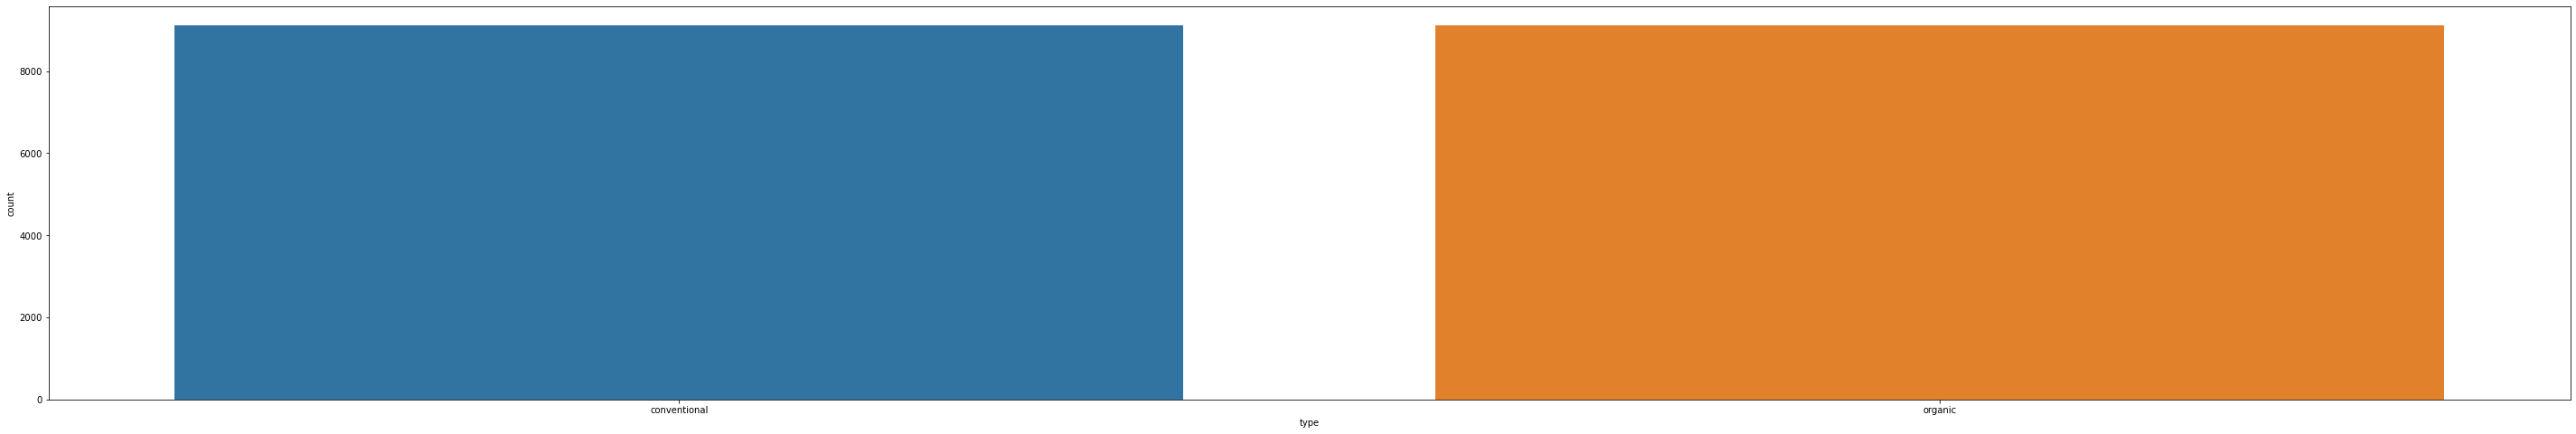

In [24]:
#Type
plt.figure(figsize=(50,8))
ax=sns.countplot(x='type',data=df)
print(df['type'].value_counts())

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


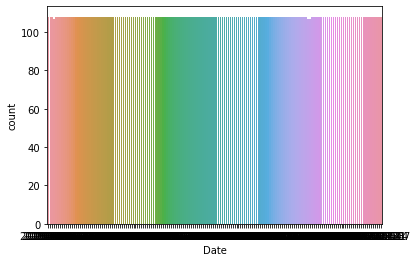

In [25]:
#Item_Fat_Content
ax=sns.countplot(x='Date',data=df)
print(df['Date'].value_counts())

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

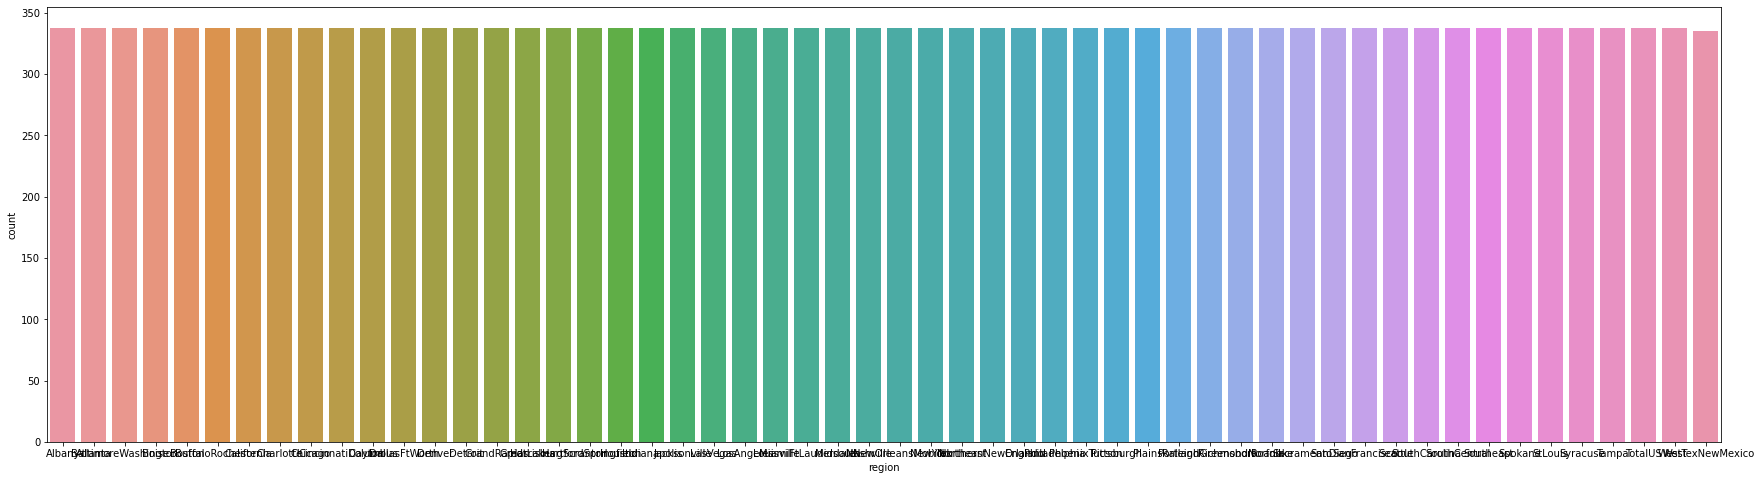

In [26]:
#Item_Type
plt.figure(figsize=(30,8))
ax=sns.countplot(x='region',data=df)
print(df['region'].value_counts())

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

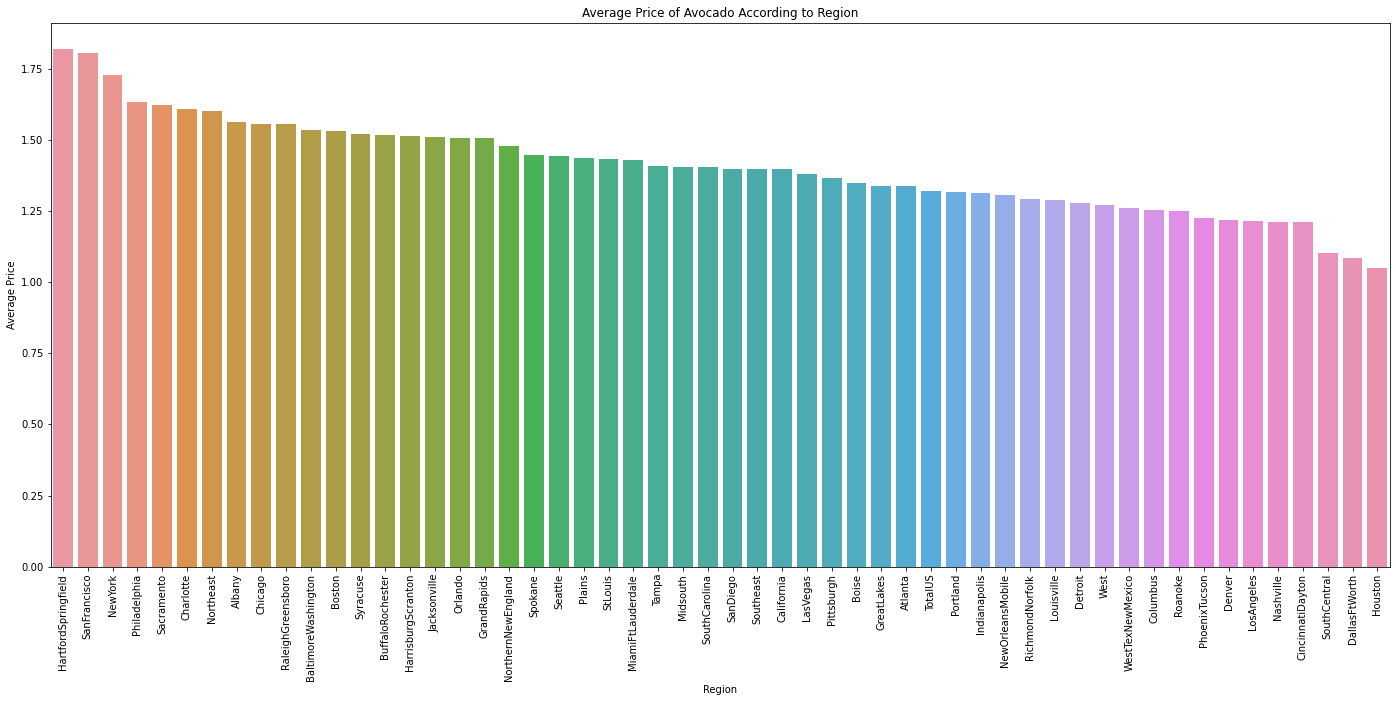

In [27]:
# average price according to region
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

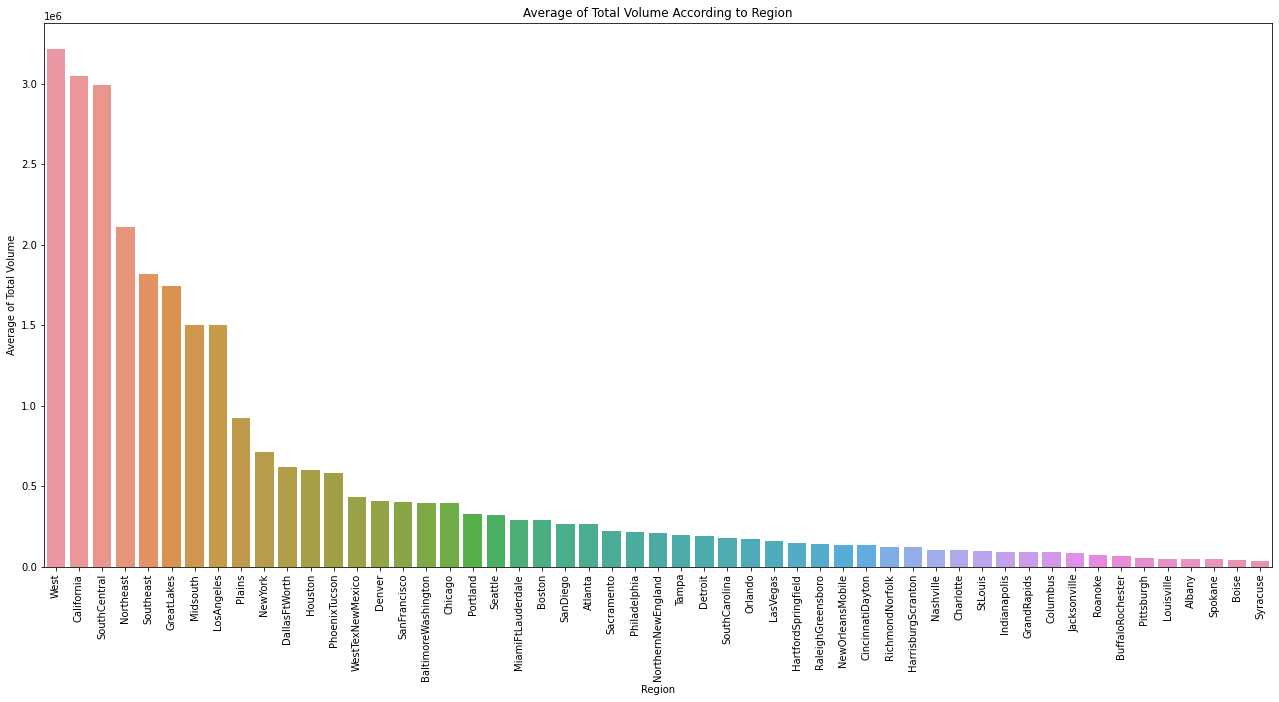

In [28]:
# Total volume according to region
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

Text(0.5, 1.0, 'Average Price')

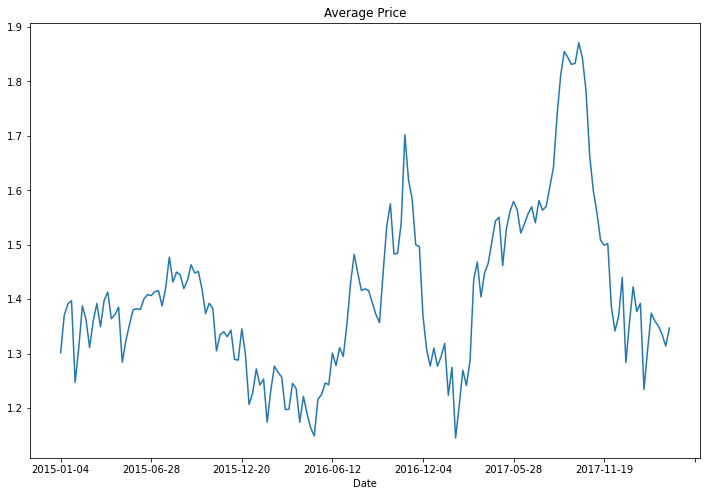

In [29]:
# how price is distributed along date column

byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

# Observations Univariate Analysis on Categorical Data 
From the above count plots 
- The regional column has 54 regions
- The type column has only two types of avocado.
- In the type column the data is equally balanced
- we can see the price variation from 2015 to 2017.From 2016 prices dropped and rose again to an uptime high and dropped in 2017
- Average price was lowest in houston region and highest in hartfordspringfield


# Step 3.2 Updating Null values

In [30]:
# checking for null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We shall update:
- All continous data with the mean
- All Categorical data with the mode

Lets go!

 # Observations on Null Update 
From the above we can see that there are no null values! 

# Step 3.3 Encoding
- We cannot perform Exploratory Data Analysis on Non-numerical Data, so we have to first of all convert them to numerical data
- Here we shall adopt Ordinal Encoder to transform the all Non-numerical column into Numerical Data!

In [31]:
#initializing....
enc=OrdinalEncoder()

In [32]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [33]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [34]:
#Tranforming into numerical data
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [35]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,160.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,159.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,158.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [36]:
# view top 5 datasets
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0


In [37]:
# view bottom 5 datasets
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,161.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,160.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,159.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,158.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0
18248,157.0,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1.0,2018,53.0


In [38]:
# view random sample
df.sample(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
4606,73.0,1.40,117486.96,1336.42,68421.33,1567.32,46161.89,29242.90,16522.32,396.67,0.0,2016,34.0
15926,137.0,2.16,75146.55,10649.20,18026.76,0.00,46470.59,46450.59,20.00,0.00,1.0,2017,22.0
8123,140.0,1.89,57493.94,15581.38,21528.72,94.37,20289.47,11533.00,8688.60,67.87,0.0,2017,47.0
7049,154.0,1.03,251753.79,151885.76,18381.27,1505.00,79981.76,68849.84,10321.92,810.00,0.0,2017,27.0
6226,129.0,0.89,1327166.18,688781.77,221432.21,2113.52,414838.68,410536.20,4154.43,148.05,0.0,2017,11.0
8403,125.0,1.07,6955988.80,2356866.57,1328698.82,158308.24,3112115.17,1940875.89,1167041.00,4198.28,0.0,2017,52.0
2265,22.0,1.27,494855.95,194535.45,207213.71,14325.27,78781.52,78760.94,8.90,11.68,0.0,2015,43.0
8919,159.0,1.17,608159.45,76804.75,271528.75,18147.81,241678.14,150749.79,90544.14,384.21,0.0,2018,36.0
10837,4.0,1.69,4907.41,285.43,1416.23,4.72,3201.03,3201.03,0.00,0.00,1.0,2015,32.0
5426,85.0,1.14,390053.10,175344.71,100775.54,48.58,113884.27,80157.70,27826.57,5900.00,0.0,2016,50.0


In [39]:
#There are zero values in 4770,4046,Large Bags,Xlarge Bags
# Lets fill these zero values with the mean

df['4046'] = df['4046'].replace(0,df['4046'].mean())
df['4770'] = df['4770'].replace(0,df['4770'].mean())
df['Large Bags'] = df['Large Bags'].replace(0,df['Large Bags'].mean())
df['XLarge Bags'] = df['XLarge Bags'].replace(0,df['XLarge Bags'].mean()) 

In [40]:
# view random sample
df.sample(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9703,46.0,1.46,10812.09,6189.69,271.59,22839.735993,4350.81,4350.81,54338.088145,3106.426507,1.0,2015,11.0
7223,139.0,1.88,288210.32,24015.11,215287.21,1644.800000,47263.20,16764.03,28132.500000,2366.670000,0.0,2017,30.0
6204,151.0,0.95,898548.00,523362.00,160636.00,2920.000000,211630.00,130864.00,80717.000000,49.000000,0.0,2017,11.0
12999,77.0,1.72,3794.29,2437.58,118.08,25.300000,1213.33,1213.33,54338.088145,3106.426507,1.0,2016,20.0
9371,14.0,1.86,3619.27,44.38,915.97,22839.735993,2658.92,2658.92,54338.088145,3106.426507,1.0,2015,4.0
11891,41.0,2.02,7664.36,1523.54,3491.30,22839.735993,2649.52,2606.66,42.860000,3106.426507,1.0,2015,53.0
1528,31.0,1.10,4786334.13,105393.94,3894801.66,9116.570000,777021.96,722077.58,54944.380000,3106.426507,0.0,2015,29.0
789,42.0,1.10,2671535.94,383559.81,1460066.36,331096.840000,496812.93,335249.25,130933.760000,30629.920000,0.0,2015,15.0
7238,124.0,1.54,393289.53,10135.32,314676.72,2188.890000,66288.60,34182.37,32016.230000,90.000000,0.0,2017,30.0
9811,42.0,1.80,7895.81,1520.03,5456.64,22839.735993,919.14,383.33,535.810000,3106.426507,1.0,2015,13.0


In [41]:
# statistics of dataset
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,83.997096,1.405978,8.506440e+05,2.968940e+05,2.951546e+05,2.971957e+04,2.396392e+05,1.821947e+05,6.139498e+04,5157.291024,0.499918,2016.147899,26.495644
std,48.787638,0.402677,3.453545e+06,1.264533e+06,1.204120e+06,1.065084e+05,9.862424e+05,7.461785e+05,2.430763e+05,17391.406970,0.500014,0.939938,15.583788
min,0.000000,0.440000,8.456000e+01,1.000000e+00,0.000000e+00,8.300000e-01,0.000000e+00,0.000000e+00,9.700000e-01,1.000000,0.000000,2015.000000,0.000000
25%,42.000000,1.100000,1.083858e+04,9.750900e+02,3.008780e+03,3.786500e+02,5.088640e+03,2.849420e+03,9.187500e+02,3106.426507,0.000000,2015.000000,13.000000
50%,84.000000,1.370000,1.073768e+05,9.954770e+03,2.906102e+04,1.111933e+04,3.974383e+04,2.636282e+04,7.942080e+03,3106.426507,0.000000,2016.000000,26.000000
75%,126.000000,1.660000,4.329623e+05,1.217699e+05,1.502069e+05,2.283974e+04,1.107834e+05,8.333767e+04,5.433809e+04,3106.426507,1.000000,2017.000000,40.000000
max,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


In [42]:
df.dtypes

Date            float64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type            float64
year              int64
region          float64
dtype: object

# Observations on Encoding
Frome the above its crystal clear that all Non-numrical data have been converted(encoded) to Numerical Data!

# Step 3.4 - Normal Distribution Check(Univariate Analysis)

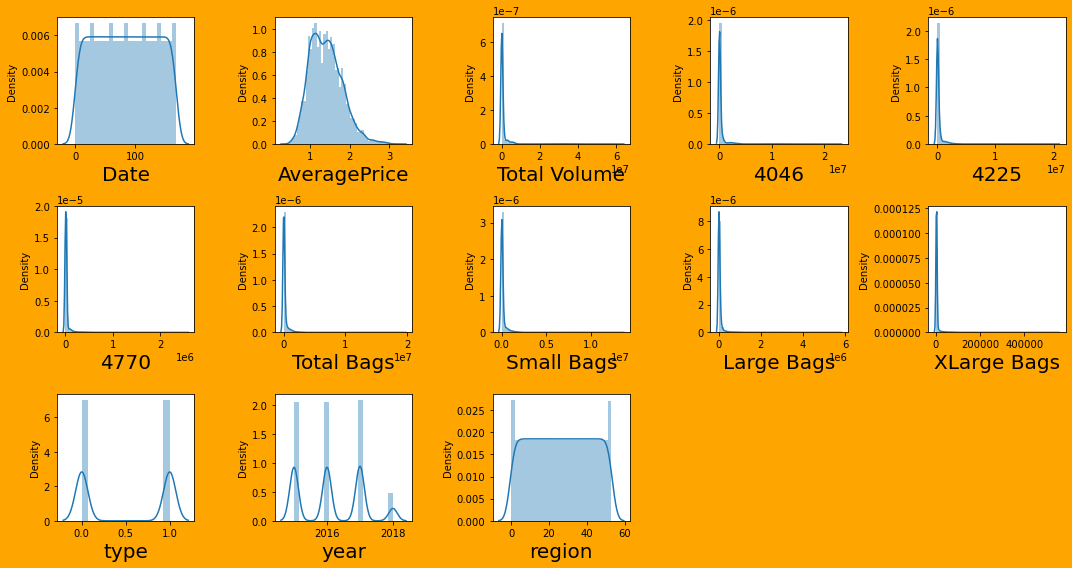

In [43]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='orange')#dimension and color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=14:
        ax = plt.subplot(3,5,plotnumber)#2,3 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution Check
From the above density plot:

- We can see that All the features does not obey a normal distribution, the building blocks is not in tandem with a normalized     curve

- The normal distribution of these features;region,type,year has no contribution to our Model Building since they are categorical data

- The normal distribution of the average sales column also has no contribution to our Model Building since its the Target     variable

In [44]:
#extracting only the features(wihtout the Label) from the original dataset and store in features
features=df.drop(columns=['AveragePrice'],axis=1)
features

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0.0,2015,0.0
1,50.0,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0.0,2015,0.0
2,49.0,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0.0,2015,0.0
3,48.0,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0.0,2015,0.0
4,47.0,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161.0,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1.0,2018,53.0
18245,160.0,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1.0,2018,53.0
18246,159.0,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1.0,2018,53.0
18247,158.0,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1.0,2018,53.0


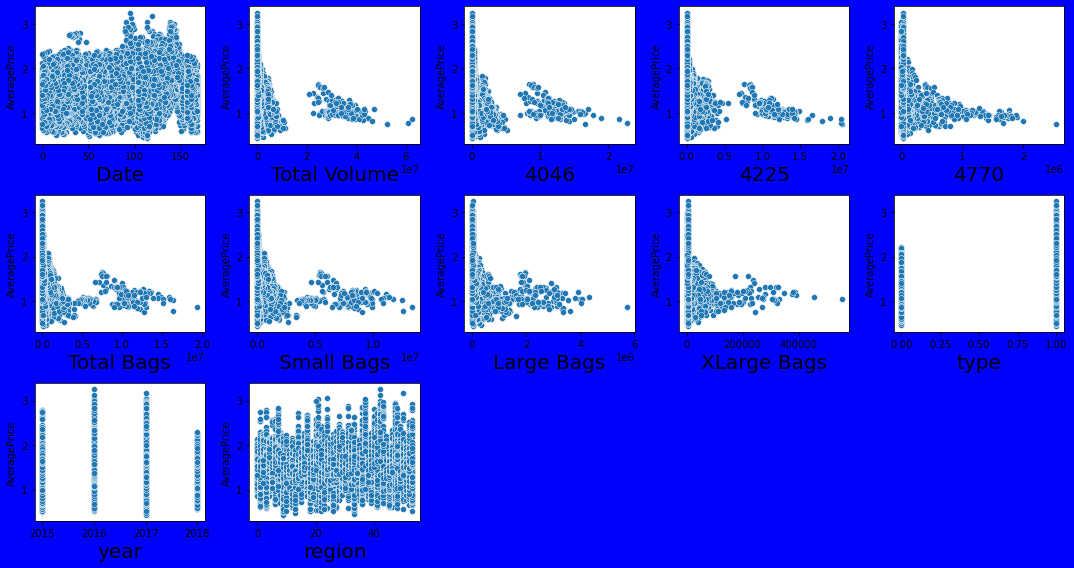

In [45]:
#Check for the relatinship between each features and Target
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in features:#triggering your for loop
    if plotnumber<=14:#since there are 3 features
        ax = plt.subplot(3,5,plotnumber)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=features[column],y=df['AveragePrice'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot

From the above scatter plot we can see a relationship between some of the features and the Label(average price).

# Step 3.5 - Count Plot Check(Bivariate Analysis)
- Lets visualize the relationship between the Categorical features and the Label

# Step 3.6 - Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [46]:
#checking for general correlation
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.145514,0.009263,-0.004886,-0.016895,-0.047574,0.064688,0.056902,0.067791,0.064993,-0.000060,0.950274,-0.000101
AveragePrice,0.145514,1.000000,-0.192752,-0.206687,-0.172928,-0.146752,-0.177088,-0.174730,-0.154010,-0.084869,0.615845,0.093197,-0.011716
Total Volume,0.009263,-0.192752,1.000000,0.977463,0.974181,0.864455,0.963047,0.967238,0.877119,0.736038,-0.232434,0.017193,0.174176
4046,-0.004886,-0.206687,0.977463,1.000000,0.925692,0.826171,0.919654,0.924875,0.835021,0.688072,-0.222827,0.003574,0.192410
4225,-0.016895,-0.172928,0.974181,0.925692,1.000000,0.880297,0.905787,0.916031,0.806419,0.677395,-0.232289,-0.009559,0.145726
4770,-0.047574,-0.146752,0.864455,0.826171,0.880297,1.000000,0.784316,0.794761,0.689588,0.667364,-0.147329,-0.036746,0.085718
Total Bags,0.064688,-0.177088,0.963047,0.919654,0.905787,0.784316,1.000000,0.994335,0.939733,0.794764,-0.217788,0.071552,0.175256
Small Bags,0.056902,-0.174730,0.967238,0.924875,0.916031,0.794761,0.994335,1.000000,0.899235,0.796958,-0.220535,0.063915,0.164702
Large Bags,0.067791,-0.154010,0.877119,0.835021,0.806419,0.689588,0.939733,0.899235,1.000000,0.702041,-0.173936,0.074300,0.196301
XLarge Bags,0.064993,-0.084869,0.736038,0.688072,0.677395,0.667364,0.794764,0.796958,0.702041,1.000000,-0.120678,0.069213,0.082393


In [47]:
#checking for correlation between each feature and Label
df.corr()['AveragePrice'].sort_values(ascending=True)

4046           -0.206687
Total Volume   -0.192752
Total Bags     -0.177088
Small Bags     -0.174730
4225           -0.172928
Large Bags     -0.154010
4770           -0.146752
XLarge Bags    -0.084869
region         -0.011716
year            0.093197
Date            0.145514
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

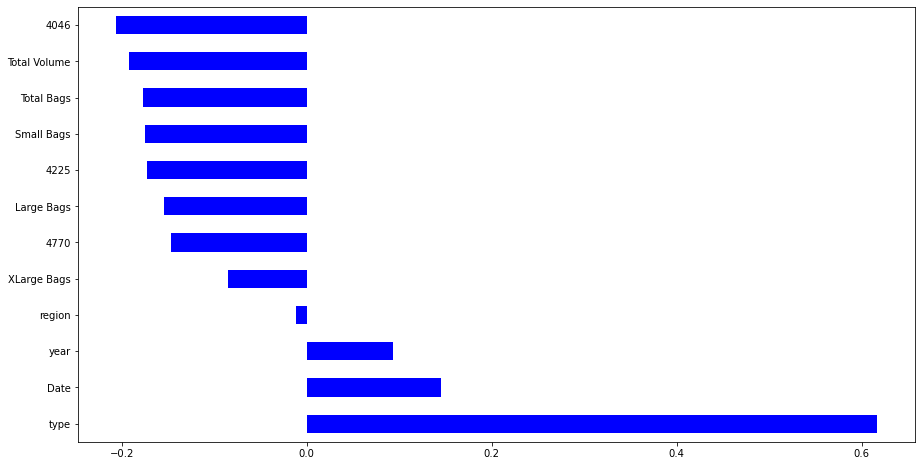

In [48]:
#Plotting a bar chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='barh', color='b')
plt.show()

# Multicollinearity Check

<AxesSubplot:>

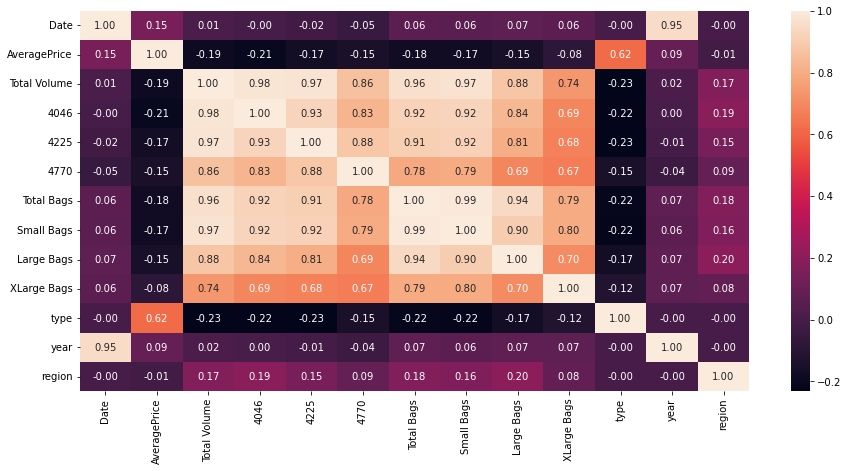

In [49]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

As we can see that most features share a 'direct relationship' between each other! as the majority of the map-squares are bright! But lets conlcude with our findings first:

<function matplotlib.pyplot.show(close=None, block=None)>

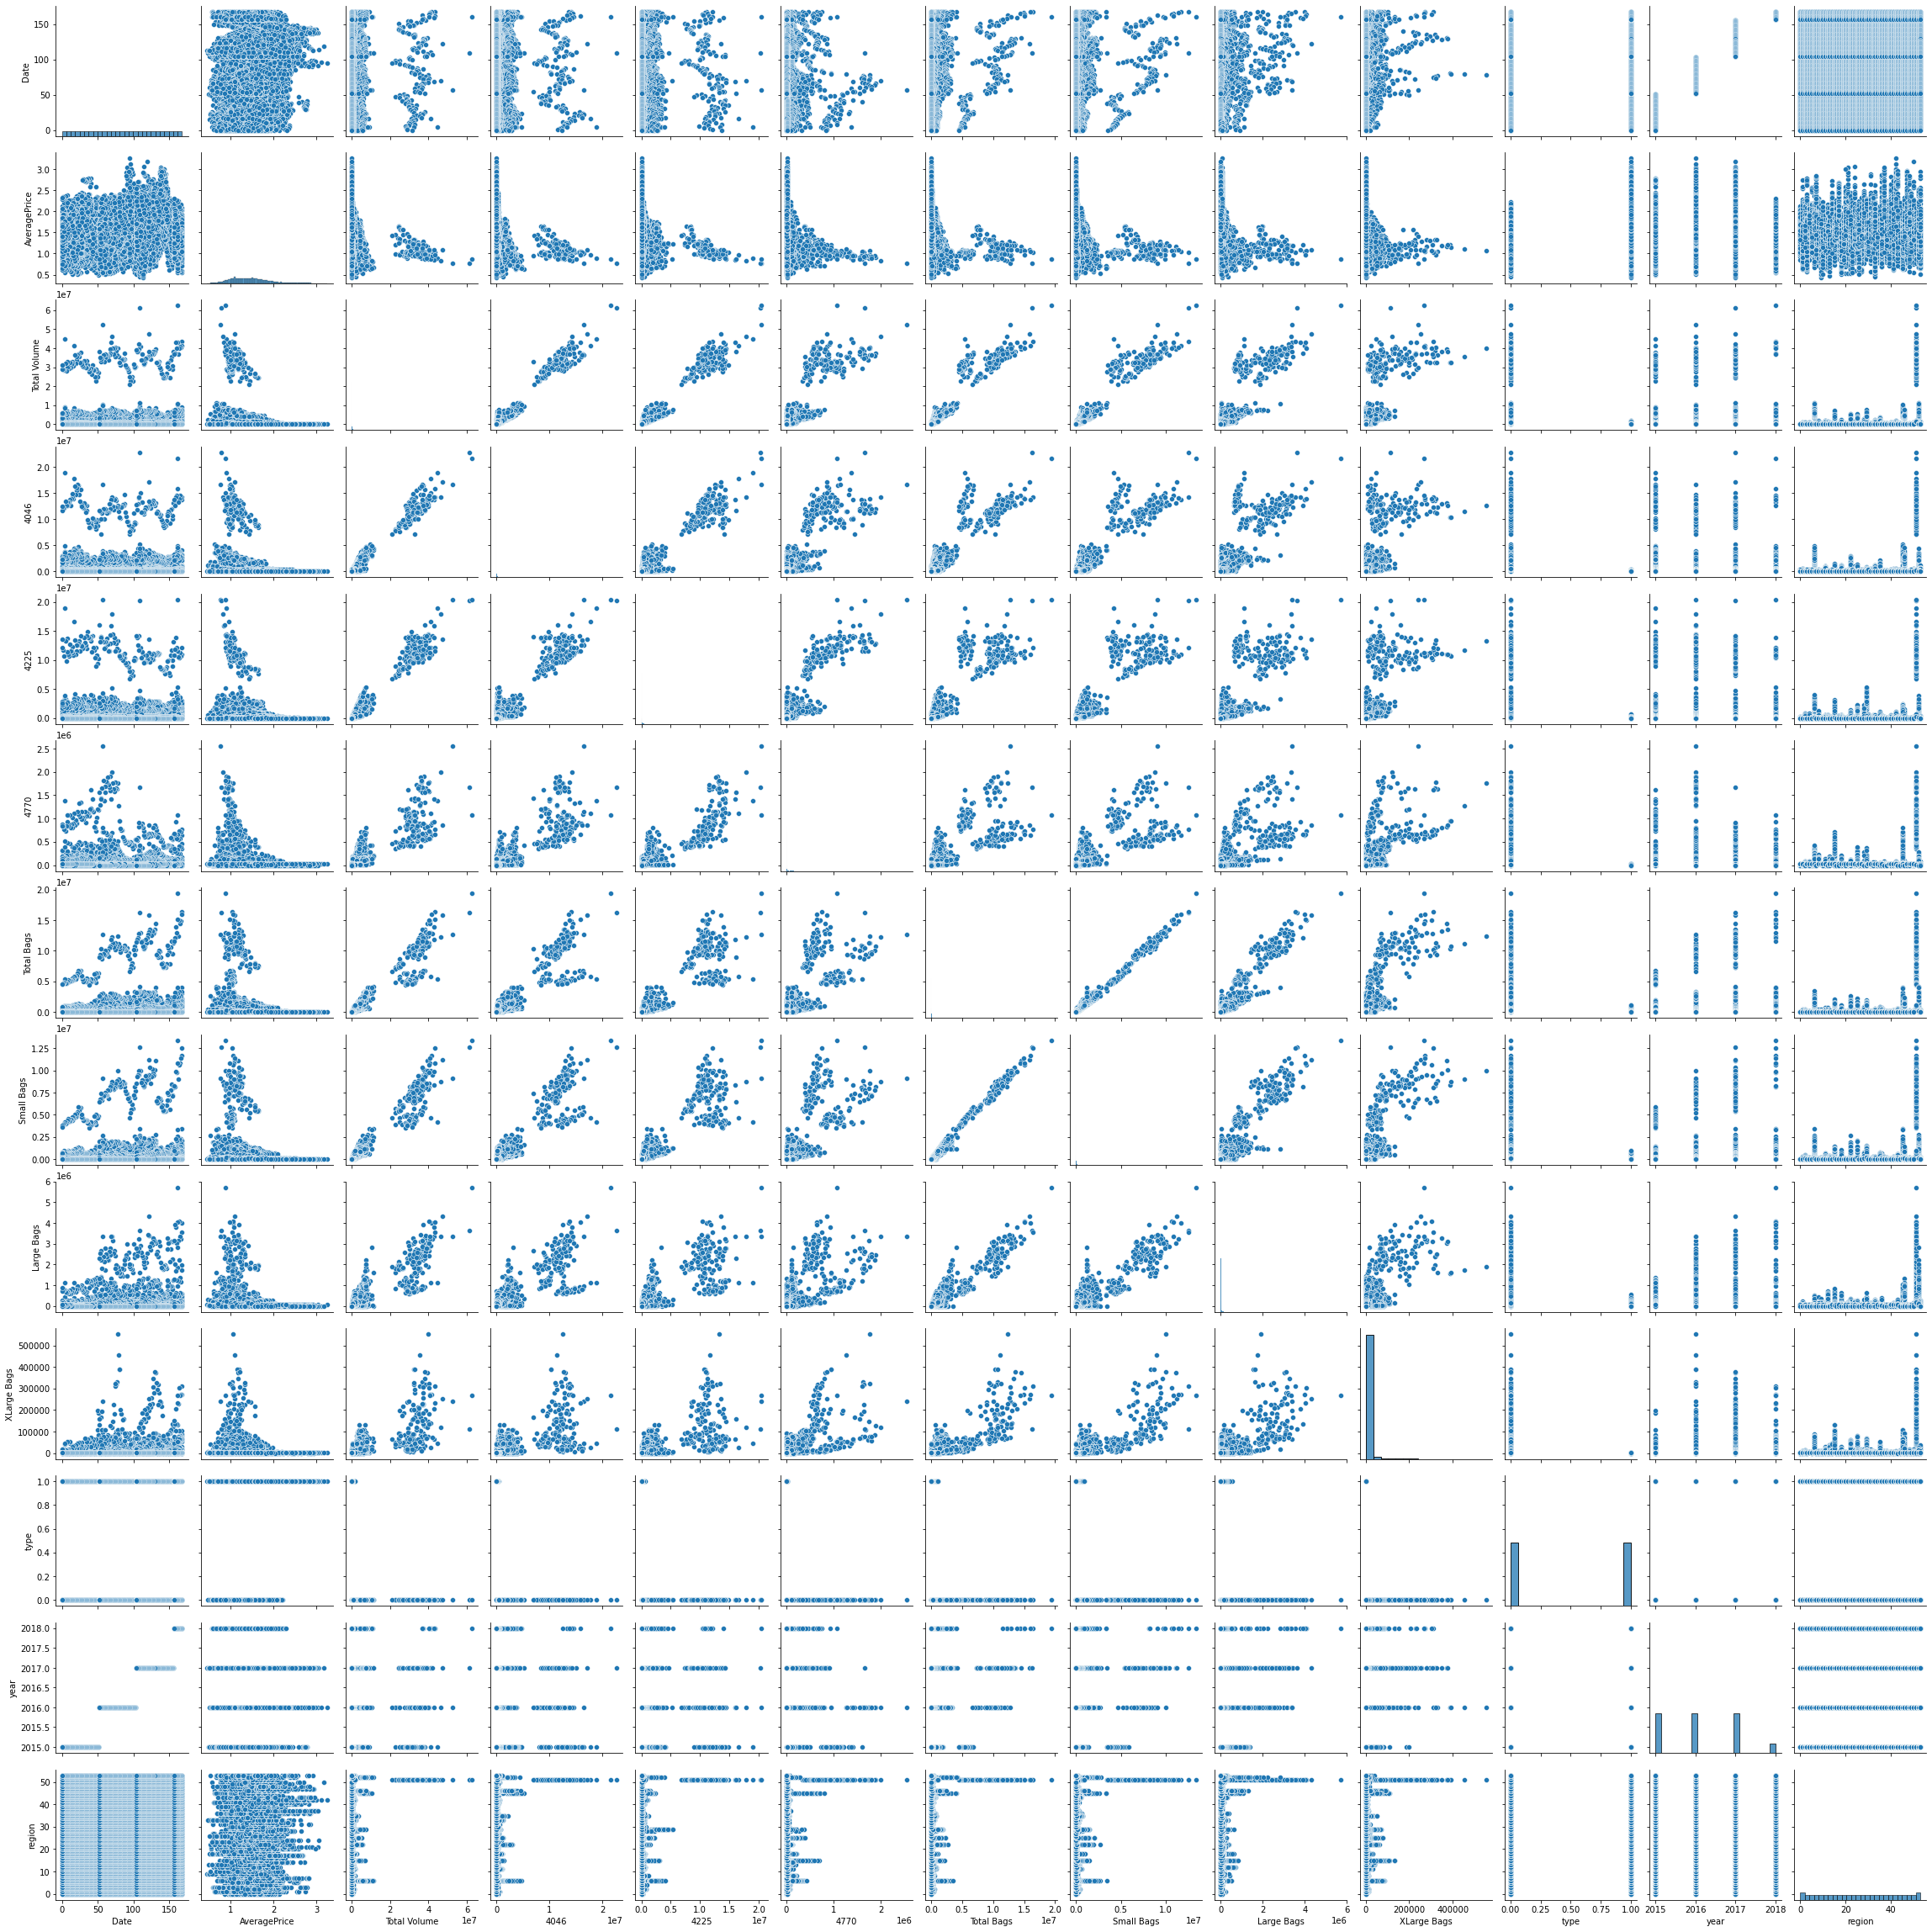

In [50]:
#lets also consumate further our quest for Multicollinearity check by ploting a pair plot
sns.pairplot(df)
plt.show

In [50]:
df.corr()['AveragePrice'].sort_values()

4046           -0.206687
Total Volume   -0.192752
Total Bags     -0.177088
Small Bags     -0.174730
4225           -0.172928
Large Bags     -0.154010
4770           -0.146752
XLarge Bags    -0.084869
region         -0.011716
year            0.093197
Date            0.145514
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

# Observations on Correlation(Collinearity & Multicollinearity)
From the above correlation statistics;

Collinearity:

 - 4046 has a negative correlation of 26% with the target column which can be considered as a weak bond
 - Total Volume  has a negative correlation of 19% with the target column which can be considered as a weak bond
 - Total Bags  has a negative correlation of 17% with the target column which can be considered as a weak bond
 - Small Bags has a negative correlation of 15% with the target column which can be considered as a weak bond
 - 4225  has a negative correlation of 17% with the target column which can be considered as a weak bond
 - Large Bags  has a negative correlation of 15% with the target column which can be considered as a weak bond
 - 4770  has a negative correlation of 15% with the target column which can be considered as a  poor bond
 - XLarge Bags  has a negative correlation of 8% with the target column which can be considered as a weak bond
 - region  has a positive correlation of 1% with the target column which can be considered as a poor bond
 - year   has a positive correlation of 10% with the target column which can be considered as a poor bond
 - type  has a positive correlation of 57% with the target column which can be considered as a good bond
 - date  has a positive correlation of 14% with the target column which can be considered as a poor bond

 
 - Feature with Maximum correlation = '57%'
 - Feature with Minimum correlation = '1%'
 
Multicollinearity:
 - From the heatmap we can see that the ALMOST ALL pairs of features have noticeable correllation between them 

But we will reconfrim this during further steps by finding the Variance Inflation Factor(VIF)


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# Step 3.4 - Outlier Check

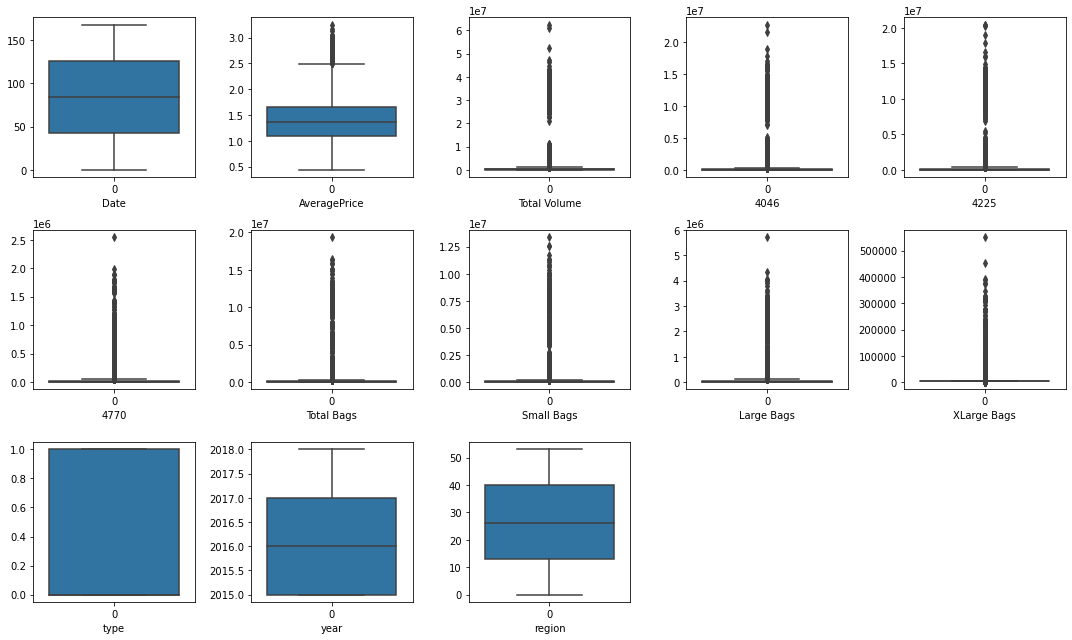

In [51]:
#Check for allien-datapoints in each features data which has been stored in the dataframe; 'features_continuos'
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=14:#this was made 8 just to allow for 4 spaces
        plt.subplot(3,5,graph)#3,4 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot for all columns
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Check
 - From the above visualization plot its evident ONLY the item_visibility feature posses outliers, however this is subject to      further analysis and reconfirmation using the zscore!
 
 -  The outlier of the categorical data does not impact our model
 
 - The outlier of the Target data does not impact our model

# Step 3.5 - Skewness Check

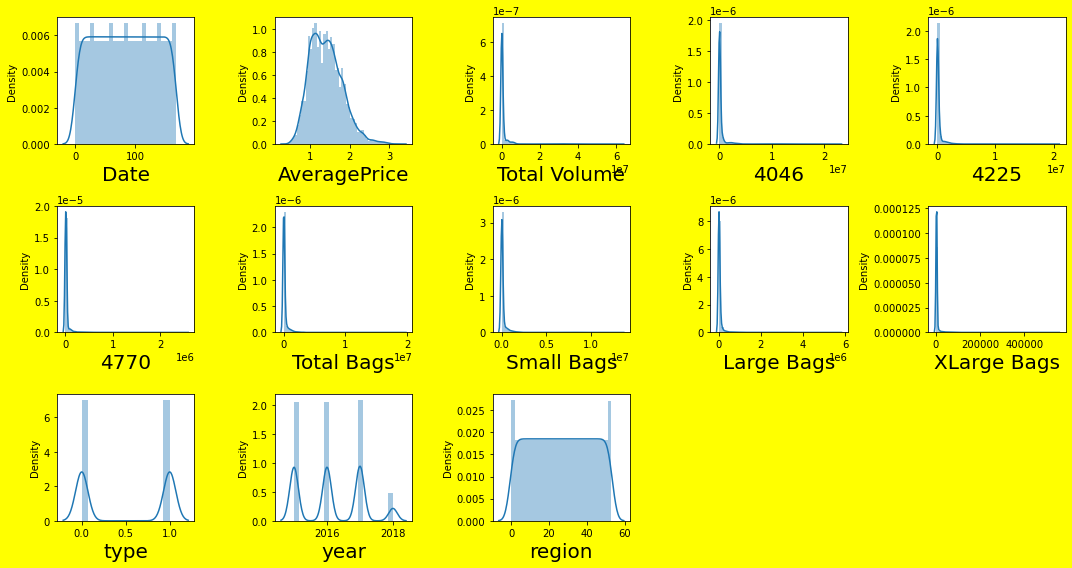

In [52]:
#Visualizing for skewness...
plt.figure(figsize=(15,8), facecolor='yellow')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=14:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df[column])#performing a distribution plot for all the columns
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

In [53]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'features'
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648526
4225             8.942466
4770            10.244212
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.818731
XLarge Bags     13.483327
type             0.000329
year             0.215339
region           0.000030
dtype: float64

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.50.Meaning any value outside +/-0.50 contains skewness. Hence the below features are skewed:

Total Volume     9.007687
4046             8.648526
4225             8.942466
4770            10.244212
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.818731
XLarge Bags     13.483327

# Step 4 - DATA PREPROCESSING

# Step 4.1 - Removal of Duplicates and Unwanted Column

In [54]:
#Recheking shape of original data
df.shape

(18249, 13)

In [55]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(18249, 13)

It appears there are no duplicates since there is no change in the number of rows!

# Step 4.2 - Dropping of Features that strongly promotes multicollinearity(VIF)

<AxesSubplot:>

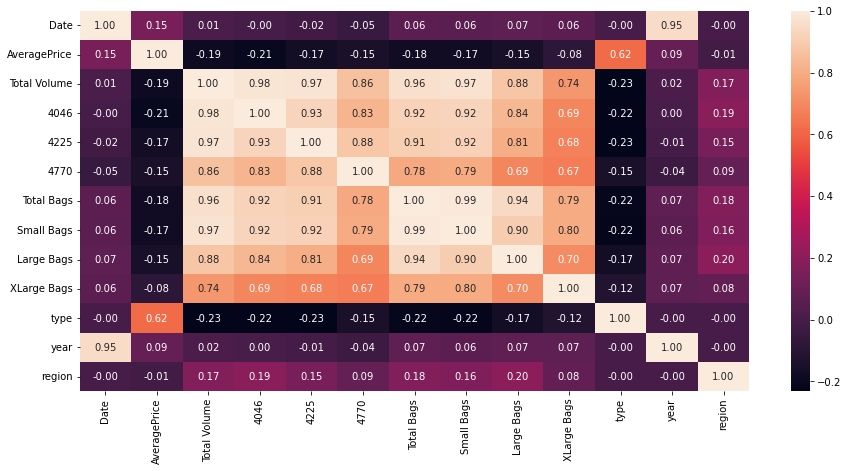

In [56]:
#Lets have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

From the heatmap above we can see that there is visible correlation between one another

However, lets reconfirm by calculating the Variance Inflation Factor(VIF)!

# Variance Inflation Factor(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [57]:
X=df.drop(columns=['AveragePrice'])
Y=df['AveragePrice']

In [58]:
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[-0.67635986, -0.22771641, -0.23397205, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.69685742, -0.23042664, -0.23425869, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.71735497, -0.21208462, -0.23416346, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [ 1.53737632, -0.24233073, -0.23384933, ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.51687877, -0.24162464, -0.23358384, ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.49638121, -0.24125273, -0.23250267, ...,  1.00016441,
         1.97050371,  1.70081131]])

In [59]:
#checking the shape
X_Scaled.shape

(18249, 12)

Now we shall treat the above shape as an array of numbers(tuple) where 8523 and 11 are the zeroth and first index respectively.

In [60]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [61]:
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#This is a list comprehension. in the for loop, the range(X_Scaled.shape[1]) which also means range(3) or (0,1,2), since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 3. Now all the columns in X_Scaled which is (0,1,2) will now be compared with the entire X_Scaled one by one using the other part of the syntax which is variance_inflation_factor(X_Scaled, i). To shed more light, what happens here is that during th comparison using variance_inflation_factor(X_Scaled, i), the i is seen as a ‘Label’ while the X_Scaled is seen as a Feature. The output of this list comprehension is then stored in a column named 'vif' inside the empty ‘vif dataframe’ created above

In [62]:
vif['Features'] = X.columns#creating another column named 'Features' inside the empty vif Dataframe created earlier and populating it with a data called X.columns(i.e column names from the X DataFrame which was created by dropping the Label – ‘sales’ )
vif

,vif,Features
0,10.382662,Date
1,9745.579949,Total Volume
2,1297.206313,4046
3,1212.125366,4225
4,13.809283,4770
5,4332.919997,Total Bags
6,1970.463074,Small Bags
7,198.063442,Large Bags
8,4.228081,XLarge Bags
9,1.268621,type


From the above vif dataframe,we are setting a vif threshold of 6, meaning any feature with Variance Inflation Factor greater than 5 is assumed to have a multicollinearity problem. it is not standard. The dataset demands.

In lieu of the above assumption, MULTICOLLINEARITY DOES NOT EXIST!

# Step 4.3 - Removal of Outliers

This will be achieved using the zscore

In [63]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.676360,0.188689,0.227716,0.233972,0.199902,0.278590,0.234170,0.232647,0.252198,0.117927,0.999836,1.221282,1.700252
1,0.696857,0.139020,0.230427,0.234259,0.208054,0.278495,0.233350,0.231568,0.252181,0.117927,0.999836,1.221282,1.700252
2,0.717355,1.182069,0.212085,0.234163,0.154478,0.277817,0.234730,0.233399,0.252157,0.117927,0.999836,1.221282,1.700252
3,0.737853,0.809551,0.223444,0.233897,0.185350,0.278361,0.237096,0.236568,0.252032,0.117927,0.999836,1.221282,1.700252
4,0.758350,0.312861,0.231538,0.234047,0.208719,0.278331,0.236718,0.236154,0.251769,0.117927,0.999836,1.221282,1.700252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.578371,0.556347,0.241373,0.233173,0.243857,0.064596,0.229301,0.226665,0.250805,0.117927,1.000164,1.970504,1.700811
18245,1.557874,0.755023,0.242296,0.233850,0.242277,0.064596,0.233594,0.232196,0.251246,0.117927,1.000164,1.970504,1.700811
18246,1.537376,1.152375,0.242331,0.233849,0.243090,0.272208,0.233463,0.231644,0.252408,0.117927,1.000164,1.970504,1.700811
18247,1.516879,1.301382,0.241625,0.233584,0.242651,0.272216,0.231866,0.229543,0.252376,0.117927,1.000164,1.970504,1.700811


In [64]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(18249, 13)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [65]:
#index number
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([3, 3, 9, ..., 1, 1, 1], dtype=int64))

In [66]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)#Data still with outliers
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (18249, 13)
New DataFrame (17665, 13)
total_dropped_rows 584


A Total of 584 outliers have been removed! Lets move on! Data is looking great!

In [67]:
#Checking the new dataframe with non-outliers
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0.0,2015,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0.0,2015,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0.0,2015,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0.0,2015,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161.0,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1.0,2018,53.0
18245,160.0,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1.0,2018,53.0
18246,159.0,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1.0,2018,53.0
18247,158.0,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1.0,2018,53.0


Now we need to reset our data having removed outliers.....

In [68]:
#Lets reset our data having removed outliers
df_new.reset_index(inplace=True)
df_new

,index,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,51.0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0.0,2015,0.0
1,1,50.0,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0.0,2015,0.0
2,2,49.0,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0.0,2015,0.0
3,3,48.0,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0.0,2015,0.0
4,4,47.0,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17660,18244,161.0,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1.0,2018,53.0
17661,18245,160.0,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1.0,2018,53.0
17662,18246,159.0,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1.0,2018,53.0
17663,18247,158.0,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1.0,2018,53.0


In [69]:
#dropping the index columns which is not needed
df_new.drop('index', axis=1,inplace=True)
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0.0,2015,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0.0,2015,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0.0,2015,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0.0,2015,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17660,161.0,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1.0,2018,53.0
17661,160.0,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1.0,2018,53.0
17662,159.0,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1.0,2018,53.0
17663,158.0,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1.0,2018,53.0


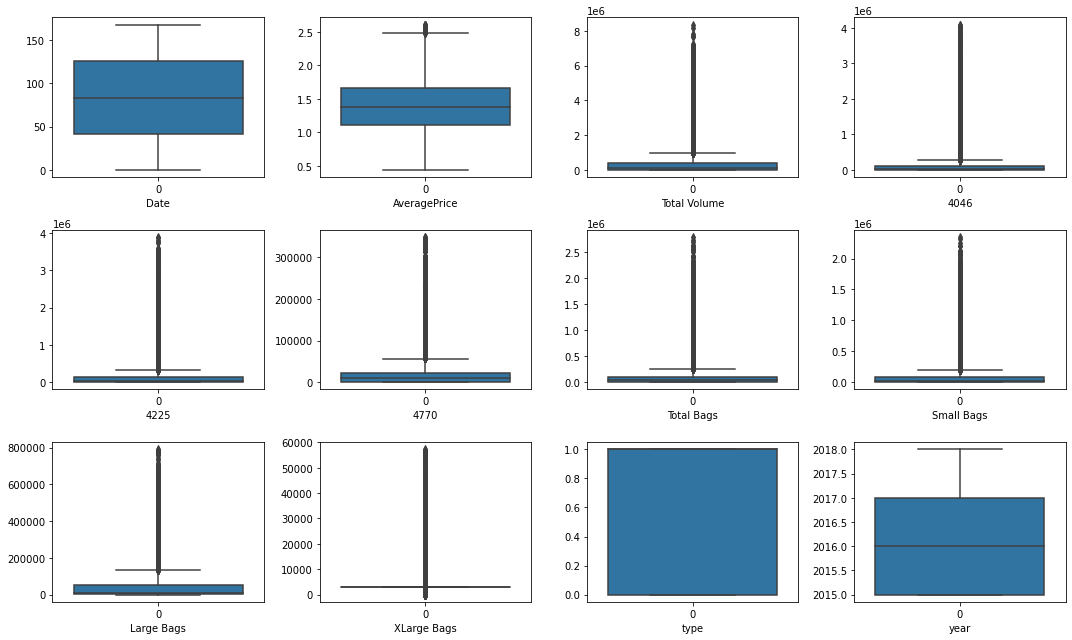

In [70]:
#rechecking for allien-datapoints in each features data which are now stored in df_new
plt.figure(figsize=(15,9))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if graph<=12:
        plt.subplot(3,4,graph)#3,4 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df_new[column])#performing box plots
        plt.xlabel(column,fontsize=10)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form.

From the above we can see that all outliers have been removed across the features!

# Step 4.4 - Transforming Data to Remove Skewness using Power transformation

In [71]:
#rechecking for skewness...
df_new.skew()

Date            0.013368
AveragePrice    0.378326
Total Volume    3.752409
4046            4.860146
4225            4.434417
4770            4.843557
Total Bags      4.050021
Small Bags      4.214225
Large Bags      4.879193
XLarge Bags     6.279517
type           -0.036126
year            0.229600
region          0.013290
dtype: float64

- Since we don't apply skewness removal on target data, we need to create a sub data frame that does not include the sales         column

- For the skewness data, only the newspaper column has skewness in its data

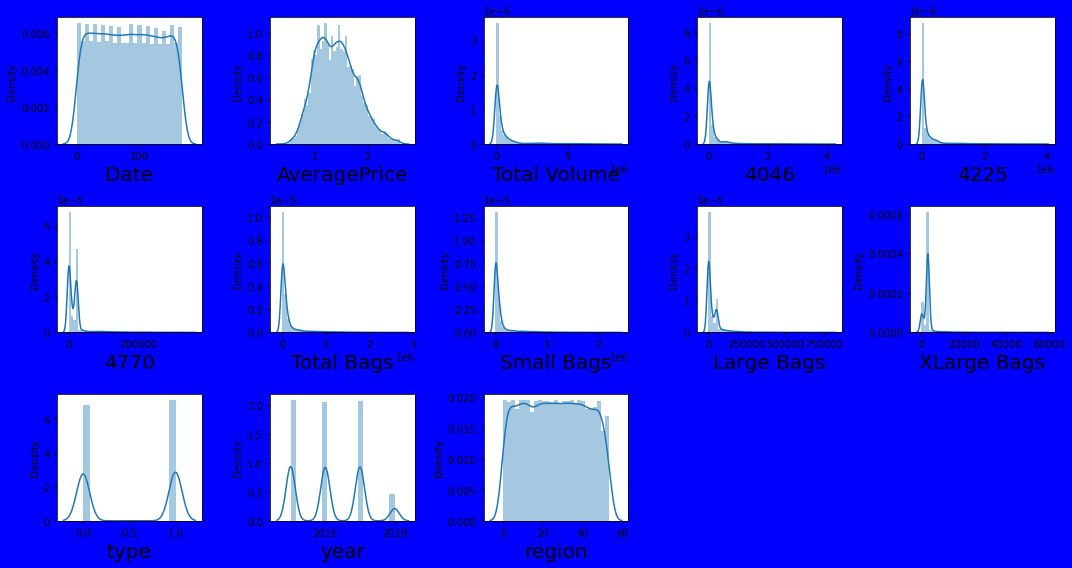

In [72]:
#Visualizing for the current skewness before Power Transformation
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=14:#since there are 6 features
        ax = plt.subplot(3,5,plotnumber)#3,3 means arrange the graphs in 3-rows and 4-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with Length
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 12
plt.tight_layout()#This is just to show you data in a compact form. 

# Feature engineering and selection

In [73]:
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0.0,2015,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0.0,2015,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0.0,2015,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0.0,2015,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17660,161.0,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1.0,2018,53.0
17661,160.0,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1.0,2018,53.0
17662,159.0,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1.0,2018,53.0
17663,158.0,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1.0,2018,53.0


Let lets go ahead and apply Power Transformation!

# Step 4.5 - Seperating the datasets into X and Y variables

In [74]:
#seperation and dropping region and date columns because they are not showing much relationship with the target
X=df_new.drop(columns=['AveragePrice','region','Date'])
Y=df_new['AveragePrice']

# Transforming data into standard normal distribution

In [75]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[-0.39243458, -0.35920313, -0.27961705, ..., -0.07562135,
        -1.01822434, -1.21031372],
       [-0.4016113 , -0.36002319, -0.3041063 , ..., -0.07562135,
        -1.01822434, -1.21031372],
       [-0.339506  , -0.35975074, -0.1431633 , ..., -0.07562135,
        -1.01822434, -1.21031372],
       ...,
       [-0.44191808, -0.35885203, -0.40935284, ..., -0.07562135,
         0.98210184,  1.98028349],
       [-0.43952728, -0.35809249, -0.40803495, ..., -0.07562135,
         0.98210184,  1.98028349],
       [-0.43826802, -0.35499935, -0.40959399, ..., -0.07562135,
         0.98210184,  1.98028349]])

What standard scaler does is to bring mean to zero and standard deviation to 1

In [76]:
#reconfirming that mean is 0
X_Scaled.mean()

4.2887579200500945e-15

In [77]:
#reconfirming that standard deviation is 1
X_Scaled.std()

0.9999999999999999

# Step 5 - MODEL BUILDING

# Step 5.1 - Linear Regression

# Best Random State

In [78]:
#Using LinearRegression to get the best Random state
lm=LinearRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  43.06 and 42.72 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  0.23 and 0.23 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  0.08 and 0.23 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  0.29 and 0.48 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  43.04 and 42.73 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  0.23 and 0.23 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  0.08 and 0.23 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  0.29 and 0.48 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  42.0 and 42.98 respectively
At random state of :-  2 the mean absolute error of 

The best accuracy is 44.86% at random state 49

We have found best_random state value as 49. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [79]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=4,test_size=0.20)

In [80]:
x_train.shape

(14132, 10)

In [81]:
x_test.shape

(3533, 10)

In [82]:
y_train.shape

(14132,)

In [83]:
y_test.shape

(3533,)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [84]:
lm=LinearRegression()#Initializing...
lm.fit(x_train,y_train)#Training...
pred_test=lm.predict(x_test)#Prediciting using test data...
pred_train=lm.predict(x_train)#Prediciting using training data...
Test_Accuracy_lm= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_lm= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_lm= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_lm= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_lm= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_lm= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_lm= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_lm= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_lm)#printing mean absolute error
print("Test_MSE ", Test_mse_lm)#printing mean squared error
print("Test_RMSE ", Test_rmse_lm)#printing root mean squared error

Test_Accuracy  42.36
Test_MAE  0.23000075751662227
Test_MSE  0.08617331565590705
Test_RMSE  0.2935529179822729


LinearRegression is producing average accuracy 42.36% which is not very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [85]:
#Validation accuracy
vac=cross_val_score(lm,X,Y,cv=5)
CV_Score_lm=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_lm)

[-0.15808531  0.07682802  0.36819272  0.0083837   0.00997714]
Cross Validation Score is  0.06105925236218608


# Difference between Accuracy Score and Cross Validation Score

In [86]:
Test_Accuracy_lm

0.4236119057851502

In [87]:
CV_Score_lm

0.06105925236218608

In [88]:
lm_Acc_vs_CV_Score=np.abs(Test_Accuracy_lm-CV_Score_lm)
print("Difference between Accuracy and Cross Validation Score = ",lm_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.3625526534229641


From the above you can see that difference between Accuracy and Cross Validation score is high (0.36) meaning that model is having overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.2 - KNN Regressor

# Best Random State

In [89]:
#Using KNeighbors Regressor to get the best Random state
knn=KNeighborsRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  75.01 and 83.71 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  0.13 and 0.11 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  0.04 and 0.11 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  0.19 and 0.33 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  75.46 and 83.67 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  0.13 and 0.11 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  0.04 and 0.11 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  0.19 and 0.33 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  74.16 and 83.89 respectively
At random state of :-  2 the mean absolute error of

KeyboardInterrupt: 

The best accuracy is 76.35% at random state 197

We have found best_random state value as 197. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [90]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=197,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [91]:
knn=KNeighborsRegressor()#Initializing...
knn.fit(x_train,y_train)#Training...
pred_test=knn.predict(x_test)#Prediciting using test data...
pred_train=knn.predict(x_train)#Prediciting using training data...
Test_Accuracy_knn= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_knn= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_knn= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_knn= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_knn= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_knn= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_knn= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_knn= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_knn)#printing mean absolute error
print("Test_MSE ", Test_mse_knn)#printing mean squared error
print("Test_RMSE ", Test_rmse_knn)#printing root mean squared error

Test_Accuracy  76.35
Test_MAE  0.1313229549957543
Test_MSE  0.03545062439852816
Test_RMSE  0.1882833619800968


KNeighbors is producing average accuracy 76.35% which is Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [92]:
#Validation accuracy
vac=cross_val_score(knn,X,Y,cv=5)
CV_Score_knn=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_knn)

[-1.244323    0.18435016  0.39413579  0.02209805 -0.30535317]
Cross Validation Score is  -0.18981843398079098


# Difference between Accuracy Score and Cross Validation Score

In [93]:
Test_Accuracy_knn

0.763458547151021

In [94]:
CV_Score_knn

-0.18981843398079098

In [95]:
knn_Acc_vs_CV_Score=np.abs(Test_Accuracy_knn-CV_Score_knn)
print("Difference between Accuracy and Cross Validation Score = ",knn_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.953276981131812


From the above you can see that difference between Accuracy and Cross Validation score is high (0.95) meaning that model is having overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.3 - Decision Tree Regressor

In [96]:
#Using Decision Tree Regressor to get the best Random state
dt=DecisionTreeRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  60.71 and 100.0 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  0.16 and 0.0 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  0.06 and 0.0 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  0.24 and 0.0 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  60.68 and 100.0 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  0.16 and 0.0 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  0.06 and 0.0 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  0.24 and 0.0 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  57.94 and 100.0 respectively
At random state of :-  2 the mean absolute error of Testi

The best accuracy is 64.83% at random state 165

We have found best_random state value as 165. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [97]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=165,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [98]:
dt=DecisionTreeRegressor()#Initializing...
dt.fit(x_train,y_train)#Training...
pred_test=dt.predict(x_test)#Prediciting using test data...
pred_train=dt.predict(x_train)#Prediciting using training data...
Test_Accuracy_dt= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_dt= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_dt= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_dt= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_dt= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_dt= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_dt= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_dt= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_dt)#printing mean absolute error
print("Test_MSE ", Test_mse_dt)#printing mean squared error
print("Test_RMSE ", Test_rmse_dt)#printing root mean squared error

Test_Accuracy  64.03
Test_MAE  0.15496744975941126
Test_MSE  0.0557248797056326
Test_RMSE  0.2360611778874972


Decision Tree is producing average accuracy 64.278% which is not very Good!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [99]:
#Validation accuracy
vac=cross_val_score(dt,X,Y,cv=5)
CV_Score_dt=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_dt)

[-1.17527748 -0.1917198   0.05015907 -0.31858465 -0.47912686]
Cross Validation Score is  -0.42290994528881265


# Difference between Accuracy Score and Cross Validation Score

In [100]:
Test_Accuracy_dt

0.6402673412713349

In [101]:
CV_Score_dt

-0.42290994528881265

In [102]:
dt_Acc_vs_CV_Score=np.abs(Test_Accuracy_dt-CV_Score_dt)
print("Difference between Accuracy and Cross Validation Score = ",dt_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  1.0631772865601476


From the above you can see that difference between Accuracy and Cross Validation score is high(1.0905) meaning that model is having overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.4 - RandomForest Regressor

# Best Random State

In [103]:
#Using RandomForest Regressor to get the best Random state
rf=RandomForestRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    rf.fit(x_train,y_train)
    pred_train=rf.predict(x_train)
    pred_test=rf.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")


At random state of :- 0 Testing Accuracy and Training Accuracy are:-  80.93 and 97.31 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  0.12 and 0.04 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  0.03 and 0.04 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  0.17 and 0.21 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  80.73 and 97.24 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  0.12 and 0.04 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  0.03 and 0.04 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  0.17 and 0.21 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  79.66 and 97.32 respectively
At random state of :-  2 the mean absolute error of

KeyboardInterrupt: 

The best accuracy is 81.59% at random state 49

We have found best_random state value as 49. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [104]:
#using the random state of 6
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=49,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [105]:
rf=RandomForestRegressor()#Initializing...
rf.fit(x_train,y_train)#Training...
pred_test=rf.predict(x_test)#Prediciting using test data...
pred_train=rf.predict(x_train)#Prediciting using training data...
Test_Accuracy_rf= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_rf= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_rf= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_rf= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_rf= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_rf= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_rf= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_rf= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_rf)#printing mean absolute error
print("Test_MSE ", Test_mse_rf)#printing mean squared error
print("Test_RMSE ", Test_rmse_rf)#printing root mean squared error

Test_Accuracy  81.62
Test_MAE  0.11720268893291823
Test_MSE  0.027603931483158792
Test_RMSE  0.16614430921087484


RandomForest is producing good accuracy = 81.71%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [ ]:
#Validation accuracy
vac=cross_val_score(rf,X,Y,cv=5)
CV_Score_rf=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_rf)

# Difference between Accuracy Score and Cross Validation Score

In [ ]:
Test_Accuracy_rf

In [ ]:
CV_Score_rf

In [ ]:
rf_Acc_vs_CV_Score=np.abs(Test_Accuracy_rf-CV_Score_rf)
print("Difference between Accuracy and Cross Validation Score = ",rf_Acc_vs_CV_Score)

From the above you can see that difference between Accuracy and Cross Validation score is high (0.57) meaning that model is having overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.5 - AdaBoost Classifier

# Best Random State 

In [ ]:
#Using AdaBoost Regressor to get the best Random state
ada=AdaBoostRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ada.fit(x_train,y_train)
    pred_train=ada.predict(x_train)
    pred_test=ada.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

The best accuracy is 50.75% at random state 182

We have found best_random state value as 182. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [118]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=182,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [119]:
ada=AdaBoostRegressor()#Initializing...
ada.fit(x_train,y_train)#Training...
pred_test=ada.predict(x_test)#Prediciting using test data...
pred_train=ada.predict(x_train)#Prediciting using training data...
Test_Accuracy_ada= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_ada= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_ada= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_ada= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_ada= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_ada= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_ada= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_ada= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_ada)#printing mean absolute error
print("Test_MSE ", Test_mse_ada)#printing mean squared error
print("Test_RMSE ", Test_rmse_ada)#printing root mean squared error

Test_Accuracy  50.72
Test_MAE  0.21682420278451495
Test_MSE  0.07296084024843742
Test_RMSE  0.2701126436293522


AdaBoost is producing good accuracy = 50.72%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [120]:
#Validation accuracy
vac=cross_val_score(ada,X,Y,cv=5)
CV_Score_ada=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ada)

[-0.87553597  0.16612043  0.44745821  0.09956772  0.07365583]
Cross Validation Score is  -0.01774675466376132


# Difference between Accuracy Score and Cross Validation Score

In [121]:
Test_Accuracy_ada

0.5071877853184013

In [122]:
CV_Score_ada

-0.01774675466376132

In [123]:
ada_Acc_vs_CV_Score=np.abs(Test_Accuracy_ada-CV_Score_ada)
print("Difference between Accuracy and Cross Validation Score = ",ada_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.5249345399821626


From the above you can see that difference between Accuracy and Cross Validation score is (0.52) meaning that model is having overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.6 - GradientBoosting Classifier

# Best Random State

In [146]:
#Using GradientBoosting to get the best Random state
gb=GradientBoostingRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    gb.fit(x_train,y_train)
    pred_train=gb.predict(x_train)
    pred_test=gb.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  65.29 and 65.92 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  0.17 and 0.17 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  0.05 and 0.17 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  0.23 and 0.42 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  64.22 and 65.74 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  0.18 and 0.17 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  0.05 and 0.17 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  0.23 and 0.42 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  63.41 and 66.05 respectively
At random state of :-  2 the mean absolute error of

KeyboardInterrupt: 

The best accuracy is 64.95% at random state 6

We have found best_random state value as 6. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [147]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=6,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [148]:
gb=GradientBoostingRegressor()#Initializing...
gb.fit(x_train,y_train)#Training...
pred_test=gb.predict(x_test)#Prediciting using test data...
pred_train=gb.predict(x_train)#Prediciting using training data...
Test_Accuracy_gb= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_gb= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_gb= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_gb= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_gb= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_gb= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_gb= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_gb= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_gb)#printing mean absolute error
print("Test_MSE ", Test_mse_gb)#printing mean squared error
print("Test_RMSE ", Test_rmse_gb)#printing root mean squared error

Test_Accuracy  64.95
Test_MAE  0.1751176599504709
Test_MSE  0.05286526122960623
Test_RMSE  0.2299244685317468


GradientBoosting is producing not very good accuracy = 64.95%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [149]:
#Validation accuracy
vac=cross_val_score(gb,X,Y,cv=5)
CV_Score_gb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_gb)

[0.16176645 0.34239543 0.54731587 0.23794068 0.11281239]
Cross Validation Score is  0.28044616355441276


# Difference between Accuracy Score and Cross Validation Score

In [150]:
Test_Accuracy_gb

0.6494656934925405

In [151]:
CV_Score_gb

0.28044616355441276

In [152]:
gb_Acc_vs_CV_Score=np.abs(Test_Accuracy_gb-CV_Score_gb)
print("Difference between Accuracy and Cross Validation Score = ",gb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.3690195299381277


From the above you can see that difference between Accuracy and Cross Validation score is a bit high (0.369) meaning that model is having overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.7 - XGBoost Classifier

# Best Random State

In [235]:
#Using XGBoost Regressor to get the best Random state
xgb=XGBRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    xgb.fit(x_train,y_train)
    pred_train=xgb.predict(x_train)
    pred_test=xgb.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  53.58 and 84.93 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  797.63 and 443.13 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  1207024.95 and 443.13 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  1098.65 and 21.05 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  49.91 and 84.86 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  795.89 and 450.26 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  1214031.78 and 450.26 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  1101.83 and 21.22 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  52.73 and 84.73 respectively
At random state of 

The best accuracy is 55.34% at random state 117

We have found best_random state value as 117. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [126]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=117,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [127]:
xgb=XGBRegressor()#Initializing...
xgb.fit(x_train,y_train)#Training...
pred_test=xgb.predict(x_test)#Prediciting using test data...
pred_train=xgb.predict(x_train)#Prediciting using training data...
Test_Accuracy_xgb=(metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_xgb= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_xgb= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_xgb= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_xgb= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_xgb= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_xgb= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_xgb= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_xgb)#printing mean absolute error
print("Test_MSE ", Test_mse_xgb)#printing mean squared error
print("Test_RMSE ", Test_rmse_xgb)#printing root mean squared error

Test_Accuracy  75.89
Test_MAE  0.14054760226203267
Test_MSE  0.036036249533424505
Test_RMSE  0.18983216148330742


XGBoost is producing good accuracy = 75.89%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [128]:
#Validation accuracy
vac=cross_val_score(xgb,X,Y,cv=5)
CV_Score_xgb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_xgb)

[0.18724496 0.38591883 0.52984045 0.25155083 0.02820334]
Cross Validation Score is  0.27655168269892905


# Difference between Accuracy Score and Cross Validation Score

In [129]:
Test_Accuracy_xgb

0.7589216606867023

In [130]:
CV_Score_xgb

0.27655168269892905

In [131]:
xgb_Acc_vs_CV_Score=np.abs(Test_Accuracy_xgb-CV_Score_xgb)
print("Difference between Accuracy and Cross Validation Score = ",xgb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.48236997798777326


From the above you can see that difference between Accuracy and Cross Validation score is a bit high (0.48) meaning that model is having overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 5.8 - ExtraTrees Regressor

# Best Random State

In [132]:
#Using ExtraTree Regressor to get the best Random state
ex=ExtraTreesRegressor()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ex.fit(x_train,y_train)
    pred_train=ex.predict(x_train)
    pred_test=ex.predict(x_test)
    print("At random state of :-",i,"Testing Accuracy and Training Accuracy are:- ",round(metrics.r2_score(y_test,pred_test)*100,2), "and", round(metrics.r2_score(y_train,pred_train)*100,2), "respectively")
    print("At random state of :- ",i, "the mean absolute error of Testing and Training are:- ",round(mean_absolute_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the mean squared error of Testing and Training are:- ",round(mean_squared_error(y_test,pred_test),2), "and", round(mean_absolute_error(y_train,pred_train),2), "respectively")
    print("At random state of :- ",i, "the root mean squared error of Testing and Training are:- ",round(np.sqrt(mean_squared_error(y_test,pred_test)),2), "and", round(np.sqrt(mean_absolute_error(y_train,pred_train)),2), "respectively")
    print("\n")

At random state of :- 0 Testing Accuracy and Training Accuracy are:-  82.5 and 100.0 respectively
At random state of :-  0 the mean absolute error of Testing and Training are:-  0.11 and 0.0 respectively
At random state of :-  0 the mean squared error of Testing and Training are:-  0.03 and 0.0 respectively
At random state of :-  0 the root mean squared error of Testing and Training are:-  0.16 and 0.0 respectively


At random state of :- 1 Testing Accuracy and Training Accuracy are:-  82.62 and 100.0 respectively
At random state of :-  1 the mean absolute error of Testing and Training are:-  0.11 and 0.0 respectively
At random state of :-  1 the mean squared error of Testing and Training are:-  0.03 and 0.0 respectively
At random state of :-  1 the root mean squared error of Testing and Training are:-  0.16 and 0.0 respectively


At random state of :- 2 Testing Accuracy and Training Accuracy are:-  81.43 and 100.0 respectively
At random state of :-  2 the mean absolute error of Testin

KeyboardInterrupt: 

The best accuracy is 83% at random state 49

We have found best_random state value as 49. We will now create our tain_test_splitusing this randome_state 

# Creating train_test_split....

In [134]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=49,test_size=0.20)

# Training Model and Metrics Measurement(r2_Score,MAE,MSE,RMSE)

In [135]:
ex=ExtraTreesRegressor()#Initializing...
ex.fit(x_train,y_train)#Training...
pred_test=ex.predict(x_test)#Prediciting using test data...
pred_train=ex.predict(x_train)#Prediciting using training data...
Test_Accuracy_ex= (metrics.r2_score(y_test,pred_test))#Calculating r2 score for test data
Train_Accuracy_ex= (metrics.r2_score(y_train,pred_train))#Calculating r2 score for training data
Test_mae_ex= mean_absolute_error(y_test,pred_test)#Calculating mean absolute error for test data
Train_mae_ex= mean_absolute_error(y_train,pred_train)#Calculating mean absolute error for training data
Test_mse_ex= mean_squared_error(y_test,pred_test)#Calculating mean squared error for test data
Train_mse_ex= mean_squared_error(y_train,pred_train)#Calculating mean squared error for training data
Test_rmse_ex= np.sqrt(mean_squared_error(y_test,pred_test))#Calculating root mean squared error for test data
Train_rmse_ex= np.sqrt(mean_squared_error(y_train,pred_train))#Calculating root mean squared error for training data
print("Test_Accuracy ",round(metrics.r2_score(y_test,pred_test)*100,2))#printing testing accuracy
print("Test_MAE ", Test_mae_ex)#printing mean absolute error
print("Test_MSE ", Test_mse_ex)#printing mean squared error
print("Test_RMSE ", Test_rmse_ex)#printing root mean squared error

Test_Accuracy  83.15
Test_MAE  0.10993305972261533
Test_MSE  0.025310065448627222
Test_RMSE  0.15909137452617356


ExtraTress  is producing good accuracy = 83.15%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [136]:
#Validation of accuracy
vac=cross_val_score(ex,X,Y,cv=5)
CV_Score_ex=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ex)

[ 0.2329085   0.23042567  0.55118505  0.201668   -0.01032452]
Cross Validation Score is  0.2411725403109713


# Difference between Accuracy Score and Cross Validation Score

In [137]:
Test_Accuracy_ex

0.8314985253788538

In [138]:
CV_Score_ex

0.2411725403109713

In [139]:
ex_Acc_vs_CV_Score=np.abs(Test_Accuracy_ex-CV_Score_ex)
print("Difference between Accuracy and Cross Validation Score = ",ex_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.5903259850678826


From the above you can see that difference between Accuracy and Cross Validation score is high (0.59) meaning that model is having overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see performance of other Models!

# Step 6 - COMPARING ALL MACHINE LEARNING MODELS

Lets create a dataframe that will juxtapose the metrics of all the models...

In [153]:
#Constructing a dataframe...
models = pd.DataFrame({'ML_Model' : ['Linear Regression','KNeigbors Regressor','DecisionTree Regressor','Random Forest Regressor','Ada Boosting Regressor','Gradient Boosting Regressor', 'XgBoost','Extra Trees Regressor'],'Accuracy_Score' : [Test_Accuracy_lm,Test_Accuracy_knn,Test_Accuracy_dt,Test_Accuracy_rf,Test_Accuracy_ada,Test_Accuracy_gb,Test_Accuracy_xgb,Test_Accuracy_ex],'Cross_Validation_Score':[CV_Score_lm,CV_Score_knn,CV_Score_dt,CV_Score_rf,CV_Score_ada,CV_Score_gb,CV_Score_xgb,CV_Score_ex],'Accuracy_VS_CVScore':[lm_Acc_vs_CV_Score,knn_Acc_vs_CV_Score,dt_Acc_vs_CV_Score,rf_Acc_vs_CV_Score,ada_Acc_vs_CV_Score,gb_Acc_vs_CV_Score,xgb_Acc_vs_CV_Score,ex_Acc_vs_CV_Score],'MAE':[Test_mae_lm,Test_mae_knn,Test_mae_dt,Test_mae_rf,Test_mae_ada,Test_mae_gb,Test_mae_xgb,Test_mae_ex],'MSE':[Test_mse_lm,Test_mse_knn,Test_mse_dt,Test_mse_rf,Test_mse_ada,Test_mse_gb,Test_mse_xgb,Test_mse_ex],'RMSE':[Test_rmse_lm,Test_rmse_knn,Test_rmse_dt,Test_rmse_rf,Test_rmse_ada,Test_rmse_gb,Test_rmse_xgb,Test_rmse_ex]})
models

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
0,Linear Regression,0.423612,0.061059,0.362553,0.230001,0.086173,0.293553
1,KNeigbors Regressor,0.763459,-0.189818,0.953277,0.131323,0.035451,0.188283
2,DecisionTree Regressor,0.642733,-0.447839,1.090571,0.154489,0.055343,0.235251
3,Random Forest Regressor,0.817116,0.245094,0.572022,0.117540,0.027470,0.165742
4,Ada Boosting Regressor,0.507188,-0.017747,0.524935,0.216824,0.072961,0.270113
5,Gradient Boosting Regressor,0.649466,0.280446,0.369020,0.175118,0.052865,0.229924
6,XgBoost,0.758922,0.276552,0.482370,0.140548,0.036036,0.189832
7,Extra Trees Regressor,0.831499,0.241173,0.590326,0.109933,0.025310,0.159091


In [154]:
#Converting Accuracy and Cross_Validation_Score into Percentage....
models["Accuracy_Score"] = np.ceil((models["Accuracy_Score"] * 100))
models["Cross_Validation_Score"] = np.ceil((models["Cross_Validation_Score"] * 100))
models.sort_values(by = 'Accuracy_Score', ascending = False)

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
7,Extra Trees Regressor,84.0,25.0,0.590326,0.109933,0.025310,0.159091
3,Random Forest Regressor,82.0,25.0,0.572022,0.117540,0.027470,0.165742
1,KNeigbors Regressor,77.0,-18.0,0.953277,0.131323,0.035451,0.188283
6,XgBoost,76.0,28.0,0.482370,0.140548,0.036036,0.189832
2,DecisionTree Regressor,65.0,-44.0,1.090571,0.154489,0.055343,0.235251
5,Gradient Boosting Regressor,65.0,29.0,0.369020,0.175118,0.052865,0.229924
4,Ada Boosting Regressor,51.0,-1.0,0.524935,0.216824,0.072961,0.270113
0,Linear Regression,43.0,7.0,0.362553,0.230001,0.086173,0.293553


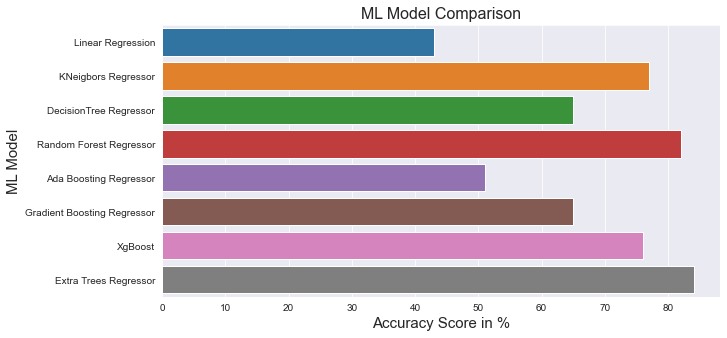

In [155]:
#Now focusing on the Accuracy Score....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'ML_Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram it seems that extra tree regressor(84%) has the highest Accuracy, However, our aim is to find the BEST MODEL, so lets consider the difference Between Accuracy_Score and Cross_Validation_Score....

# Step 6.1 - Comparing Differences between Accuracy and Cross_Validation Scores...

Lets sort by the column; Accuracy_VS_CVScore to have a good view of the differential between Accuracy_Score and CVScore

In [156]:
#Sorting....
models.sort_values(by = 'Accuracy_VS_CVScore', ascending = True)

,ML_Model,Accuracy_Score,Cross_Validation_Score,Accuracy_VS_CVScore,MAE,MSE,RMSE
0,Linear Regression,43.0,7.0,0.362553,0.230001,0.086173,0.293553
5,Gradient Boosting Regressor,65.0,29.0,0.369020,0.175118,0.052865,0.229924
6,XgBoost,76.0,28.0,0.482370,0.140548,0.036036,0.189832
4,Ada Boosting Regressor,51.0,-1.0,0.524935,0.216824,0.072961,0.270113
3,Random Forest Regressor,82.0,25.0,0.572022,0.117540,0.027470,0.165742
7,Extra Trees Regressor,84.0,25.0,0.590326,0.109933,0.025310,0.159091
1,KNeigbors Regressor,77.0,-18.0,0.953277,0.131323,0.035451,0.188283
2,DecisionTree Regressor,65.0,-44.0,1.090571,0.154489,0.055343,0.235251


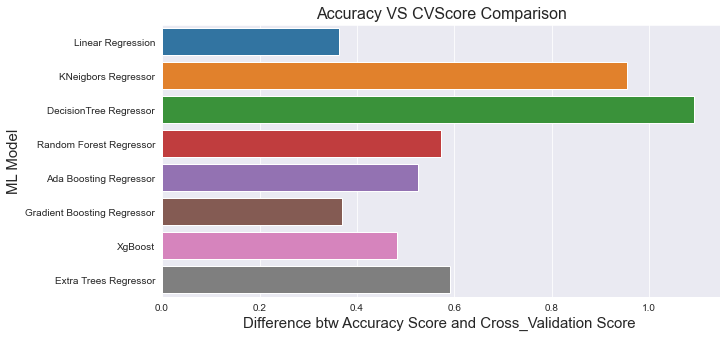

In [157]:
#A more clearer visualization.....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_VS_CVScore', y = 'ML_Model', data = models)

plt.xlabel('Difference btw Accuracy Score and Cross_Validation Score ', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('Accuracy VS CVScore Comparison', fontsize = 16)

plt.show()

From the above we can see the Model with least difference is LINEAR Regressor!

# Step 6.2 - Conclusion on Best Choice of Model

From the above we can see:
 - The Model with highest Accuracy Score(r2 score) and Cross Validation Score is EXTRATREES REGRESSOR!
 
 - It has the lowest Root Mean Square Error(RMSE): 0.16

# Hence Optimum Machine Model Chosen = EXTRATREES REGRESSION MODEL!

# Step 7 - HYPERPARAMETER TUNNING
 - Lets prepare list of parameters with options

In [158]:
ex=ExtraTreesRegressor()

In [159]:
param_grid = {'n_estimators': [10,50,100],'criterion': ['mse', 'mae'],'max_depth': [2,8,16,32,50],'max_features': ['auto','sqrt','log2'],'bootstrap': [True, False],'warm_start': [True, False]}

In [ ]:
#Gridsearch
gridsearch = GridSearchCV(ex, param_grid, cv=5, scoring='accuracy')
gridsearch.fit(x_train, y_train);

In [132]:
#Get best hyperparameters
gridsearch.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 10,
 'warm_start': True}

Now lets use the best parameters.....

In [144]:
#Instantiating using the best parameters...
ex=ExtraTreesRegressor(criterion='mse',max_depth=50,max_features='auto',n_estimators=10,warm_start=True)

In [256]:
#Instantiating using the best parameters...
ex=ExtraTreesRegressor(criterion='squared_error',max_depth=500,max_features='auto',n_estimators=500,min_samples_leaf=1,random_state=174,verbose=5,max_samples=100,ccp_alpha=0.0,bootstrap=True)

In [257]:
#fitting the model...
ex.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.2s finished


ExtraTreesRegressor(bootstrap=True, max_depth=500, max_features='auto',
                    max_samples=100, n_estimators=500, random_state=174,
                    verbose=5)

In [258]:
pred_test=ex.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


In [259]:
metrics.r2_score(y_test,pred_test)

0.9704431510558057

From the above we can see:
- Final Accuracy is 98% and RMSE is 0.007
- That the ExtraTreeRegressor has a low RMSE

HENCE WE CAN CONCLUDE OUR MODEL IS GOOD!!

# Step 8 - MODEL SAVING

In [ ]:
filename='Machine_Model_Project_Avocado '
pickle.dump(sv,open(filename,'wb'))